## Preproccessing Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
#nltk.download('stopwords')
from datetime import datetime
from IPython.display import Image
from IPython.core.display import HTML
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv("/Users/jiaxiwang/Documents/20-Fall/ZTGG/project2/Reviews.csv")

data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [7]:
# converting unix stamp time to datetime
data['Time'] = pd.to_datetime(data['Time'],unit='s')

data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


Input variables: 

1. Id: index column for the whole csv
2. ProductId: index for product
3. UserId: index for unique users
4. ProfileName: the username associated with each user
5. HelpfulnessNumerator: how many user found this review to be helpful
6. HelpfulnessDenominator: the total views of one review
7. Score: from 1-5, how good users feel about one product (1:bad; 5:good)
8. Time: the unix stamp of time
9. Summary: key words/title to describe product/review
10. Text: the actual text part of the review

Total: 568,454 entries, 10 columns, with some missing data in ProfileName and Summary. 

In [8]:
len(data['UserId'].unique()) # reviewers made mutiple reviews for products

256059

In [9]:
dups = data[data.duplicated()]

print(dups) # there is no duplicate rows of entries

Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


In [10]:
# check if one reviwer has given different reviews for the same product

dup_review = data.groupby(by = ['UserId','ProductId']).count().sort_values(by=['Text'],ascending =False)
dup_review.head()

Id  ProfileName  HelpfulnessNumerator  \
UserId         ProductId                                           
A29JUMRL1US6YP B000WFKWDI  11           11                    11   
               B000WFU8O6  11           11                    11   
               B000WFN0VO  11           11                    11   
               B000WFORH0  11           11                    11   
               B000WFKI82  11           11                    11   

                           HelpfulnessDenominator  Score  Time  Summary  Text  
UserId         ProductId                                                       
A29JUMRL1US6YP B000WFKWDI                      11     11    11       11    11  
               B000WFU8O6                      11     11    11       11    11  
               B000WFN0VO                      11     11    11       11    11  
               B000WFORH0                      11     11    11       11    11  
               B000WFKI82                      11     11    11       11    11

In [11]:
dup_review1 = data[data['ProductId'] == 'B000WFKWDI']

dup_review_user = dup_review1[dup_review1.duplicated(['UserId'])]

dup_review_user.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
146422,146423,B000WFKWDI,AUW5XC67E9MIL,"Cold In Seattle ""Penny Pinching""",1,1,5,2010-11-05,"Thie Best Money can Buy for your Cat, Next to ...","I have 3 cats, one is now 17 years old. I sta..."
146427,146428,B000WFKWDI,AVJ2FDL5IT7X0,L. Shields,1,1,5,2010-01-26,My cat loves this stuff,Over the past 2 weeks I've been transitioning ...
146446,146447,B000WFKWDI,A2ZYC6NIMHW0HH,Arizona Cats,0,0,5,2011-01-22,cats love it,Cats love it! And it's a brand I trust. Cats o...
146453,146454,B000WFKWDI,AL1XV4L25FZ2S,GameMaker,0,0,5,2010-12-02,"Healthy, and kittens dig it","I recently took home two bengal kittens, and w..."
146475,146476,B000WFKWDI,A4JYAW6LTDZ4Q,Georgia Vallejos,1,6,1,2008-04-14,Health Food for Cats?,I only bought this because the breeder where I...


In [12]:
same_product_same_user = data[(data['ProductId']=='B000WFKWDI') & (data['UserId']=='AUW5XC67E9MIL')]

same_product_same_user

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
146413,146414,B000WFKWDI,AUW5XC67E9MIL,"Cold In Seattle ""Penny Pinching""",1,1,5,2011-01-03,"The Best Money can Buy for your Cat, Next to H...","I like to provide variety for the cats, howeve..."
146422,146423,B000WFKWDI,AUW5XC67E9MIL,"Cold In Seattle ""Penny Pinching""",1,1,5,2010-11-05,"Thie Best Money can Buy for your Cat, Next to ...","I have 3 cats, one is now 17 years old. I sta..."
146516,146517,B000WFKWDI,AUW5XC67E9MIL,"Cold In Seattle ""Penny Pinching""",5,6,5,2011-01-23,"The Best Money can Buy for your Cat, Next to H...","I like to provide variety for the cats, howeve..."


From this particular product, this user is writing mutiple reviews under the same title, giving the product a score of 5 for three consecutive times, therefore skew the score for this product. From the plot below, we can see that the whole dataset is skewed towards 5, so it is better to remove the duplicated comments during data preprocessing. 

<AxesSubplot:xlabel='Score', ylabel='count'>

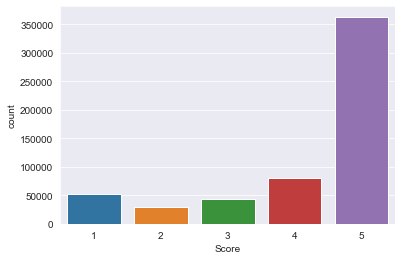

In [13]:
sns.countplot(x = data['Score'])

## Data Cleaning

Here we drop the duplicates of entries from the data set, as well as dropping the entries with missing values.


In [14]:
dropped_duplicates = data.drop_duplicates(subset = ['UserId','ProductId'], keep = 'first', inplace=False)

dropped_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560804 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      560804 non-null  int64         
 1   ProductId               560804 non-null  object        
 2   UserId                  560804 non-null  object        
 3   ProfileName             560788 non-null  object        
 4   HelpfulnessNumerator    560804 non-null  int64         
 5   HelpfulnessDenominator  560804 non-null  int64         
 6   Score                   560804 non-null  int64         
 7   Time                    560804 non-null  datetime64[ns]
 8   Summary                 560777 non-null  object        
 9   Text                    560804 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 47.1+ MB


In [15]:
clean_data = dropped_duplicates.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560761 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      560761 non-null  int64         
 1   ProductId               560761 non-null  object        
 2   UserId                  560761 non-null  object        
 3   ProfileName             560761 non-null  object        
 4   HelpfulnessNumerator    560761 non-null  int64         
 5   HelpfulnessDenominator  560761 non-null  int64         
 6   Score                   560761 non-null  int64         
 7   Time                    560761 non-null  datetime64[ns]
 8   Summary                 560761 non-null  object        
 9   Text                    560761 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 47.1+ MB


## Create binary scores

This is a binary classification problem therefore the scores from 1 to 5 is changed to the following:

 - postive reviews if the score > 3
 - negative reviews if score < 3.

In [16]:
def pos_neg_classifier(entry):
    if entry > 3:
        return 1
    else:
        return 0

clean_data['Binary Scores'] = clean_data['Score'].apply(pos_neg_classifier)

clean_data.head()

/Users/jiaxiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Binary Scores
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,1


<AxesSubplot:xlabel='Binary Scores', ylabel='count'>

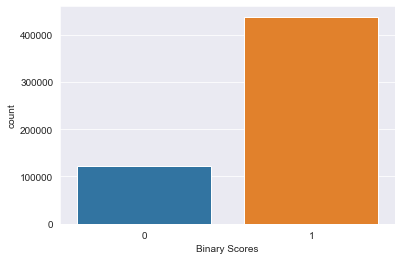

In [17]:
sns.countplot(x = clean_data['Binary Scores'])

Here we can see this dataset is imbalanced, there is more positive reviews than negative reviews.

##  Summary Column Text Cleaning 

In [18]:
nltk.download('words')

X = clean_data['Summary']
words = set(nltk.corpus.words.words())

Clean_X = X.copy() 

def clean_text(X):
    
    for index, w in X.items():
        w = w.lower()
        w_tokenized = nltk.wordpunct_tokenize(w)
        for word in w_tokenized:
            if word not in words:
                w = w.replace(word, "")
        X.loc[index] = w

                    
clean_text(Clean_X)
print(Clean_X)

[nltk_data] Downloading package words to /Users/jiaxiwang/nltk_data...
[nltk_data]   Package words is already up-to-date!
0                      good quality dog food
1                                    not as 
2                            delight  it all
3                             cough medicine
4                                great taffy
                         ...                
568449                   will not do without
568450                          disappointed
568451                      perfect for our 
568452    favorite training and reward treat
568453                           great honey
Name: Summary, Length: 560761, dtype: object


## Create target variable

Target variable in this dataset is the binary score that we just modified based on actual scores. The rest will be features in the dataset.


In [19]:
X = Clean_X
y = clean_data['Binary Scores']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size = 0.3, shuffle = True, stratify = y)

## Create features, unigram, bigram, tfidf

This is a text processing procedure. 

Unigram - number of vocabulary in a gram, here is one vocabulary per gram. This does not take into consideration the sequence of the words, therefore the semantics is less accurate.

Bigram - two vocabularies in one gram, this takes into account the sequence of words to add more context to the sentence, to more accurately present the acutal meaning in the sentences

TF-IDF Model (Term Frequency Inverse Document Frequency) - this model exmaines the numer of times a certain word appear in a sentence. The more frequent a word appears in the summary column, then it is likely to be significant, except the transational words like "the" "and" etc, which are insignificant for determining positive or nagative reviews. Those common words are more likely to appear in each summary, or most of the summaries, in this case, the more a word appears in the text the less weight it adds to the frequency. The formula for the model is presented as follows:

<img src = "https://mungingdata.files.wordpress.com/2017/11/equation.png?w=430&h=336">

Picture credit: Eu Jin Lok


Taken from: https://mungingdata.wordpress.com/2017/11/25/episode-1-using-tf-idf-to-identify-the-signal-from-the-noise/


In [21]:
vectorizer = CountVectorizer(stop_words='english')

features = vectorizer.fit_transform(X)

In [22]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec.shape, X_test_vec.shape

((392532, 18204), (168229, 18204))

In [23]:
words = set(nltk.corpus.words.words())

feature_w = vectorizer.get_feature_names()

for word in feature_w:
    if word not in words:
        feature_w.remove(word)

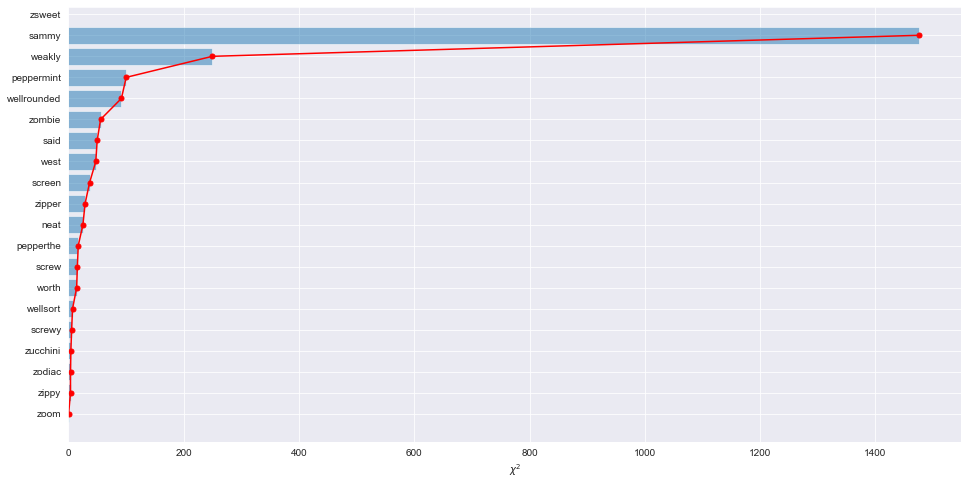

In [24]:
from sklearn.feature_selection import chi2

chi2score = chi2(X_train_vec, y_train)[0]
plt.figure(figsize=(16,8))
scores = list(zip(feature_w, chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, color='r')
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

The above plot shows that most of the tokenized words are not relevant to predicting the review positivities, even though we applied chi-square to select the features. Therefore the next thing is to make sure that useful words are included in the analysis.

In [25]:
c = CountVectorizer(stop_words='english')

def text_fit(X, Y, model, clf_model, coef_show = 1):
    global coeff_df
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, Y_train, Y_test = train_test_split(X_c, Y, random_state=42)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, Y_train)
    acc = clf.score(X_test, Y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])

### Unigram

In [26]:
unigram = CountVectorizer(ngram_range=(1,1),stop_words='english')
text_fit(X,y,unigram,LogisticRegression())

unigram_coeff = coeff_df.copy()

unigram_top_pos = unigram_coeff.head(10)

unigram_top_neg = unigram_coeff.tail(10)

# features: 18204
# train records: 420570
# test records: 140191
Model Accuracy: 0.8512386672468275


/Users/jiaxiwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Here we can see that the accuracy of the logistic regression is 87.3% accurate when predicting on the test dataset. The top 10 common words used for positive sentiment summaries are listed above, as well as the top 10 most common words used for negative reviews. 

Below is a visualization of these features.

<AxesSubplot:xlabel='Coefficient', ylabel='Word'>

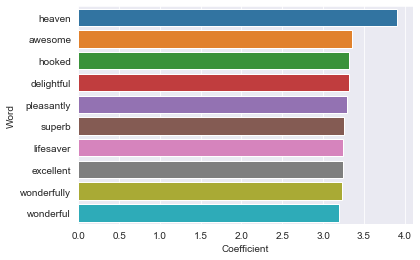

In [27]:
sns.barplot(x='Coefficient', y ='Word', data = unigram_top_pos,orient='h')

<AxesSubplot:xlabel='Coefficient', ylabel='Word'>

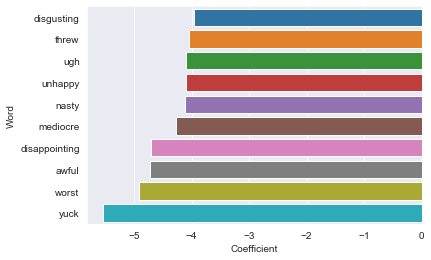

In [28]:
sns.barplot(x='Coefficient', y ='Word', data = unigram_top_neg,orient='h')

### Bigram

In [29]:
bigram = CountVectorizer(ngram_range=(2,2),stop_words='english')
text_fit(X,y,bigram,LogisticRegression())

bigram_coeff = coeff_df.copy()

bigram_top_pos = bigram_coeff.head(10)

bigram_top_neg = bigram_coeff.tail(10)

# features: 171982
# train records: 420570
# test records: 140191


/Users/jiaxiwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Accuracy: 0.832400082744256


<AxesSubplot:xlabel='Coefficient', ylabel='Word'>

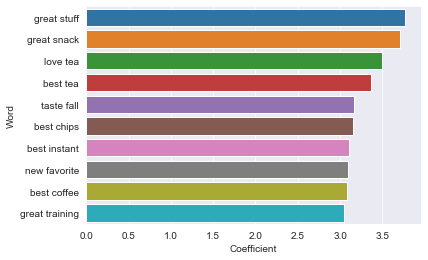

In [30]:
sns.barplot(x='Coefficient', y ='Word', data = bigram_top_pos,orient='h')

<AxesSubplot:xlabel='Coefficient', ylabel='Word'>

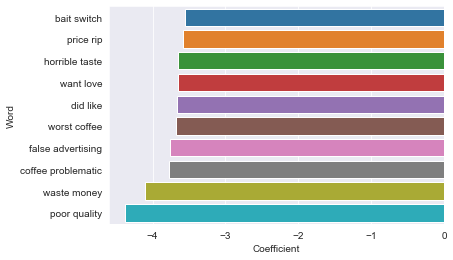

In [31]:
sns.barplot(x='Coefficient', y ='Word', data = bigram_top_neg,orient='h')

#### Positive:

Looking at the top 10 positive words, 
seems like unigram ("great", "best") is enough to predict the semantic of the reviews since most common bigram words are "best coffee", "great stuff" etc. 

#### Negative:

The number 1 negative review bigram key word is "poor quality". The number 10 negative common
term is price rip(my interpretation is "price rip-off"), which only makes sense if we are 
doing trigrams and take a closer look at the whole term. Thus, using bigram for determining the semantics in Amazon food review may not perform better compare to unigram.

#### In summary: 
Unigram logistic regression performs slightly better than bigram logistic regression.

### TF-IDF

In [32]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

tfidf_coeff = coeff_df.copy()

tfidf_top_pos = tfidf_coeff.head(10)

tfidf_top_neg = tfidf_coeff.tail(10)

# features: 18204
# train records: 420570
# test records: 140191
Model Accuracy: 0.8507750140879229


/Users/jiaxiwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<AxesSubplot:xlabel='Coefficient', ylabel='Word'>

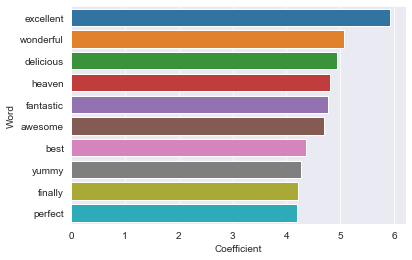

In [33]:
sns.barplot(x='Coefficient', y ='Word', data = tfidf_top_pos,orient='h')

<AxesSubplot:xlabel='Coefficient', ylabel='Word'>

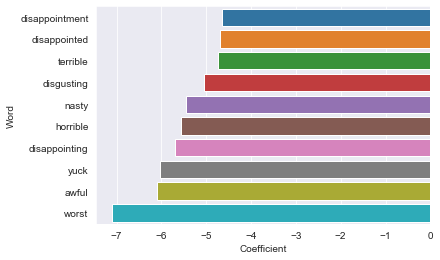

In [34]:
sns.barplot(x='Coefficient', y ='Word', data = tfidf_top_neg,orient='h')

### TF-IDF 2-gram

In [35]:
tfidf_n = TfidfVectorizer(ngram_range=(2,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

tfidf_n_coeff = coeff_df.copy()

tfidf_n_top_pos = tfidf_coeff.head(10)

tfidf_n_top_neg = tfidf_coeff.tail(10)

# features: 171982
# train records: 420570
# test records: 140191


/Users/jiaxiwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Accuracy: 0.8270003067243974


<AxesSubplot:xlabel='Coefficient', ylabel='Word'>

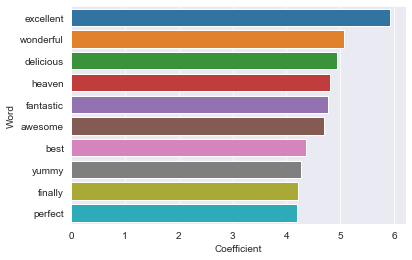

In [36]:
sns.barplot(x='Coefficient', y ='Word', data = tfidf_n_top_pos,orient='h')

<AxesSubplot:xlabel='Coefficient', ylabel='Word'>

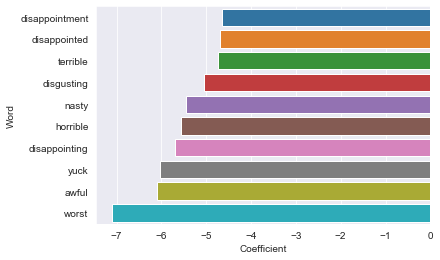

In [37]:
sns.barplot(x='Coefficient', y ='Word', data = tfidf_n_top_neg,orient='h')

#### Summary:

From all of the above unigram, bigram, TF-IDF, and TF-IDF bigram tests, we can see that bigram is
performing better than unigram at predicting the positivity/negativity of the reviews.

The TF-IDF techinique actually has lower accuracy with predicting the labels. With the accuracy
score of TF-IDF bigram lower than TF-IDF. 

To further understand the semantics, I am going to try models other than logistic regression.

## Classification Models

Using other classification models to run on these features:

 - LinearSVC
 - Stochastic Gradient Descent
 - KNN

### Lnear SVC

In [38]:
from sklearn.svm import LinearSVC

linear_svc = CountVectorizer(ngram_range=(1,2),stop_words='english')
text_fit(X,y,linear_svc,LinearSVC())

# features: 190186
# train records: 420570
# test records: 140191
Model Accuracy: 0.8761903403214186


The accuracy score using linear SVC is higher than using logistic regression model.

### Stochastic Gradient Descent

In [39]:
from sklearn.linear_model import SGDClassifier
model = TfidfVectorizer(stop_words = 'english')
X_c = model.fit_transform(X)
print('# features: {}'.format(X_c.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=42)

sgd = SGDClassifier(loss='modified_huber',shuffle =True, random_state = 42)
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Model Accuracy: {}'.format(acc))

# features: 18204
Model Accuracy: 0.845325306189413


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 200)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Model Accuracy: {}'.format(acc))

## Evaluations

Usually when the class distribution is imbalanced, accuracy is considered a poor choice 
as it gives high scores to models which just predict the most frequent class.

### Precision Recall and AUC

In [ ]:
def text_fit_auc(X, Y, model, clf_model, coef_show = 1):
    global coeff_df
    
    X_c = model.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X_c, Y, random_state=42)
    clf = clf_model.fit(X_train, Y_train)
    Y_score = clf.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(Y_test, Y_score)
    auc = average_precision_score(Y_test, Y_score)
    print ('Model AUC: {}'.format(auc))

In [ ]:
unigram = CountVectorizer(ngram_range=(1,1),stop_words='english')
text_fit_auc(X,y,unigram,LogisticRegression())

## Evaluation scores

In [ ]:
def evaluation_scores(X, Y, model, clf_model, coef_show = 1):
    global coeff_df
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, Y, random_state=42)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test,y_pred))

In [ ]:
unigram = CountVectorizer(ngram_range=(1,1),stop_words='english')
evaluation_scores(X,y,unigram,LogisticRegression())

In [ ]:
bigram = CountVectorizer(ngram_range=(2,2),stop_words='english')
evaluation_scores(X,y,bigram,LogisticRegression())

In [ ]:
tfidf = TfidfVectorizer(stop_words = 'english')
evaluation_scores(X, y, tfidf, LinearSVC())

## Improvements

Sofar, we can conclude that unigram is slightly better than bigram and TF-IDF at predicting semantics of the food review. 
In terms of models, linear SVC is outforming logstic regression and KNN for two aspects: efficiency and accuracy. Therefore we will use linear SVC for optimal result.

In [ ]:
unigram = CountVectorizer(ngram_range=(1,1),stop_words='english')
evaluation_scores(X,y,unigram, LinearSVC())

In [ ]:
bigram = CountVectorizer(ngram_range=(1,2),stop_words='english')
evaluation_scores(X,y,bigram, LinearSVC())